In [47]:
import pandas as pd
import numpy as np
import mipkit

In [3]:
PATH_2022 = '/home/lab/congvm/Affwild2/saved_labels/EXPR_Classification_Challenge/Train_Set/428.csv'
PATH_2021 = '/mnt/DATA1/hung/ABAW/data/saved_labels/EXPR_Classification_Challenge/Train_Set/428.csv'

In [15]:
df_2022 = pd.read_csv(PATH_2022)
df_2021 = pd.read_csv(PATH_2021, index_col=0)

def get_frame_id(df):
    frame_ids = [iid.split('/')[-1] for iid in df.image_id]
    df['frame_ids'] = frame_ids
    return df

df_2022 = get_frame_id(df_2022)
df_2021 = get_frame_id(df_2021)

In [20]:
df_2021

,image_id,labels_ex,frame_ids
0,../data/cropped_aligned/428/00346.jpg,0,00346.jpg
1,../data/cropped_aligned/428/00347.jpg,0,00347.jpg
2,../data/cropped_aligned/428/00348.jpg,0,00348.jpg
3,../data/cropped_aligned/428/00349.jpg,0,00349.jpg
4,../data/cropped_aligned/428/00350.jpg,0,00350.jpg
...,...,...,...
1199,../data/cropped_aligned/428/02022.jpg,0,02022.jpg
1200,../data/cropped_aligned/428/02023.jpg,0,02023.jpg
1201,../data/cropped_aligned/428/02024.jpg,0,02024.jpg
1202,../data/cropped_aligned/428/02025.jpg,0,02025.jpg


In [30]:
intersec_df_2022 = df_2022[df_2022.frame_ids.isin(df_2021.frame_ids)].reset_index(drop=True)
intersec_df_2022

,image_id,labels_ex,frame_ids
0,/home/lab/congvm/Affwild2/images/428/00449.jpg,4,00449.jpg
1,/home/lab/congvm/Affwild2/images/428/00450.jpg,4,00450.jpg
2,/home/lab/congvm/Affwild2/images/428/00451.jpg,4,00451.jpg
3,/home/lab/congvm/Affwild2/images/428/00452.jpg,4,00452.jpg
4,/home/lab/congvm/Affwild2/images/428/00453.jpg,4,00453.jpg
...,...,...,...
882,/home/lab/congvm/Affwild2/images/428/02009.jpg,0,02009.jpg
883,/home/lab/congvm/Affwild2/images/428/02010.jpg,0,02010.jpg
884,/home/lab/congvm/Affwild2/images/428/02011.jpg,0,02011.jpg
885,/home/lab/congvm/Affwild2/images/428/02012.jpg,0,02012.jpg


In [31]:
intersec_df_2021 = df_2021[df_2021.frame_ids.isin(intersec_df_2022.frame_ids)].reset_index(drop=True)
intersec_df_2021

,image_id,labels_ex,frame_ids
0,../data/cropped_aligned/428/00449.jpg,4,00449.jpg
1,../data/cropped_aligned/428/00450.jpg,4,00450.jpg
2,../data/cropped_aligned/428/00451.jpg,4,00451.jpg
3,../data/cropped_aligned/428/00452.jpg,4,00452.jpg
4,../data/cropped_aligned/428/00453.jpg,4,00453.jpg
...,...,...,...
882,../data/cropped_aligned/428/02009.jpg,0,02009.jpg
883,../data/cropped_aligned/428/02010.jpg,0,02010.jpg
884,../data/cropped_aligned/428/02011.jpg,0,02011.jpg
885,../data/cropped_aligned/428/02012.jpg,0,02012.jpg


In [38]:
np.array_equal(intersec_df_2022.labels_ex.values, intersec_df_2021.labels_ex.values)

False

In [45]:
intersec_df_2022.values[intersec_df_2022.labels_ex.values != intersec_df_2021.labels_ex.values]

array([['/home/lab/congvm/Affwild2/images/428/01808.jpg', 7, '01808.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01809.jpg', 7, '01809.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01810.jpg', 7, '01810.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01811.jpg', 7, '01811.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01812.jpg', 7, '01812.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01813.jpg', 7, '01813.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01814.jpg', 7, '01814.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01815.jpg', 7, '01815.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01816.jpg', 7, '01816.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01817.jpg', 7, '01817.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01818.jpg', 7, '01818.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01819.jpg', 7, '01819.jpg'],
       ['/home/lab/congvm/Affwild2/images/428/01820.jpg', 7, '01820.jpg'],
       ['/home/lab/congvm

In [46]:
intersec_df_2021.values[intersec_df_2022.labels_ex.values != intersec_df_2021.labels_ex.values]

array([['../data/cropped_aligned/428/01808.jpg', 4, '01808.jpg'],
       ['../data/cropped_aligned/428/01809.jpg', 4, '01809.jpg'],
       ['../data/cropped_aligned/428/01810.jpg', 4, '01810.jpg'],
       ['../data/cropped_aligned/428/01811.jpg', 4, '01811.jpg'],
       ['../data/cropped_aligned/428/01812.jpg', 4, '01812.jpg'],
       ['../data/cropped_aligned/428/01813.jpg', 4, '01813.jpg'],
       ['../data/cropped_aligned/428/01814.jpg', 4, '01814.jpg'],
       ['../data/cropped_aligned/428/01815.jpg', 4, '01815.jpg'],
       ['../data/cropped_aligned/428/01816.jpg', 4, '01816.jpg'],
       ['../data/cropped_aligned/428/01817.jpg', 4, '01817.jpg'],
       ['../data/cropped_aligned/428/01818.jpg', 4, '01818.jpg'],
       ['../data/cropped_aligned/428/01819.jpg', 4, '01819.jpg'],
       ['../data/cropped_aligned/428/01820.jpg', 4, '01820.jpg'],
       ['../data/cropped_aligned/428/01821.jpg', 4, '01821.jpg'],
       ['../data/cropped_aligned/428/01934.jpg', 4, '01934.jpg'],
       ['.

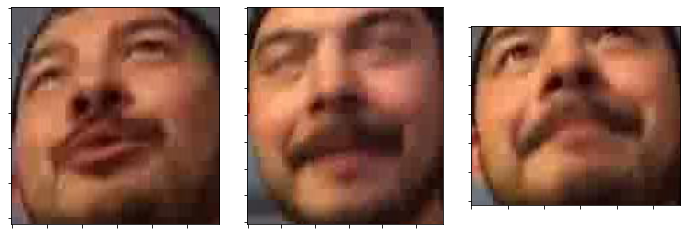

In [53]:
mipkit.imshow_with_paths(
    [
        "/home/lab/congvm/Affwild2/images/428/01808.jpg",
        "/home/lab/congvm/Affwild2/images/428/01953.jpg",
        "/home/lab/congvm/Affwild2/images/428/01957.jpg",
    ],
    ratio_size=4,
)
